<a href="https://colab.research.google.com/github/JigyasaSharma-Tech/Jigyasa/blob/main/AUDIBLE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AUDIBLE DATA**
End Term Examination (IIT-Delhi)

                          
**Problem Statement**

In an increasingly digital world, audiobooks have become a popular medium for consuming literature and content across various genres. As a leading provider of audiobooks, Audible Inc. seeks to understand the intricate behaviors, preferences, and engagement patterns of its users to tailor its offerings more effectively, improve user satisfaction, and ultimately drive growth in a competitive market. With a diverse user base spanning different demographics, listening habits, and content preferences, Audible Inc. faces the challenge of leveraging data analytics to inform strategic decisions, enhance user experience, and capitalize on market opportunities.

**Objective**

Participants are expected to use the provided dataset to analyze the current state of audiobook consumption, identify key trends and patterns, and propose data-driven strategies that Audible Inc. can implement to enhance user experience, increase market share, and drive revenue growth. Your recommendations should be backed by thorough analysis, innovative thinking, and a clear understanding of the audiobook market dynamics.



# **Importing** **Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **Load and Explore** **Data**

In [ ]:
df = pd.read_csv('/content/Audible_Data CSV.csv')

In [ ]:
df.head()

,Ref ID,Week,Welcome Date,Gender,Age_Group,City,City_Other,Smart_Phone_Android,Smart_Phone_iOS,Tablet_Android,...,Ratings_Given,Reviews_Written,Recommendations_Followed,Social_Sharing,Listening_Device_Preference,Language_Preference,Accessibility_Features_Use,Download_vs_Streaming,Time_Spent_Browsing,Genre_Exploration
0,1,1,20230511.0,Female,25 - 30 years,Bangalore,NaN,Yes,No,No,...,5,True,True,True,PC,English,False,Streaming,112,7
1,5,1,20230523.0,Male,36 - 40 years,Bangalore,NaN,No,Yes,No,...,1,False,True,True,Smartphone,Spanish,True,Download,69,6
2,8,1,20230512.0,Female,18 - 24 years,Hyderabad,NaN,Yes,No,No,...,1,True,False,True,Smartphone,German,True,Download,98,6
3,11,1,20230515.0,Male,25 - 30 years,Bangalore,NaN,Yes,No,No,...,1,True,True,False,PC,Spanish,False,Streaming,43,3
4,13,1,20230516.0,Male,18 - 24 years,Hyderabad,NaN,Yes,No,No,...,1,False,True,True,PC,German,True,Streaming,41,4


In [ ]:
df.shape

(4794, 57)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4794 entries, 0 to 4793
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ref ID                          4794 non-null   int64  
 1   Week                            4794 non-null   int64  
 2   Welcome Date                    4699 non-null   float64
 3   Gender                          4794 non-null   object 
 4   Age_Group                       4794 non-null   object 
 5   City                            4794 non-null   object 
 6   City_Other                      188 non-null    object 
 7   Smart_Phone_Android             4794 non-null   object 
 8   Smart_Phone_iOS                 4794 non-null   object 
 9   Tablet_Android                  4794 non-null   object 
 10  Tablet_iOS                      4794 non-null   object 
 11  Transport_Mode                  4794 non-null   object 
 12  Commuting_Mode                  47

In [ ]:
df.isnull().sum()

,0
Ref ID,0
Week,0
Welcome Date,95
Gender,0
Age_Group,0
City,0
City_Other,4606
Smart_Phone_Android,0
Smart_Phone_iOS,0
Tablet_Android,0


# **Data Cleaning**

In [ ]:
# Convert 'Welcome Date' to datetime format
df['Welcome Date'] = pd.to_datetime(df['Welcome Date'], errors='coerce')

In [ ]:
# Convert numeric columns (remove non-numeric errors)
numeric_cols = [
    'Event_Duration_Minutes', 'Event_Duration_Minutes.1', 'Event_Duration_Minutes.2',
    'Product_Running_Time_Minutes)', 'PRT_EDT'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Fill missing values appropriately

df.fillna({
    'Welcome Date': df['Welcome Date'].median(),
    'Product_Running_Time_Range)': "Unknown",
    'PRT_EDT': df['PRT_EDT'].median(),
    'PRT_EDT_Analyis': "Unknown"
}, inplace=True)


In [ ]:
# Drop 'City_Other' as it has too many missing values
df.drop(columns=['City_Other'], inplace=True)

In [ ]:
# Convert 'Average_Listening_Speed' from string (e.g., "1.25x") to numeric
df['Average_Listening_Speed'] = df['Average_Listening_Speed'].astype(str).str.replace('x', '', regex=False)
df['Average_Listening_Speed'] = pd.to_numeric(df['Average_Listening_Speed'], errors='coerce')

In [ ]:
# Verify cleaning
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4794 entries, 0 to 4793
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Ref ID                          4794 non-null   int64         
 1   Week                            4794 non-null   int64         
 2   Welcome Date                    4794 non-null   datetime64[ns]
 3   Gender                          4794 non-null   object        
 4   Age_Group                       4794 non-null   object        
 5   City                            4794 non-null   object        
 6   Smart_Phone_Android             4794 non-null   object        
 7   Smart_Phone_iOS                 4794 non-null   object        
 8   Tablet_Android                  4794 non-null   object        
 9   Tablet_iOS                      4794 non-null   object        
 10  Transport_Mode                  4794 non-null   object        
 11  Comm

# **Correlation Analysis** **(Ratings, Reviews, Social Sharing)**

Analyze relationships between these engagement metrics.

In [ ]:
# Convert boolean columns to integers for correlation analysis
correlation_cols = ['Ratings_Given', 'Reviews_Written', 'Social_Sharing']
df[correlation_cols] = df[correlation_cols].astype(int)

In [ ]:
# Compute correlation matrix
correlation_matrix = df[correlation_cols].corr()

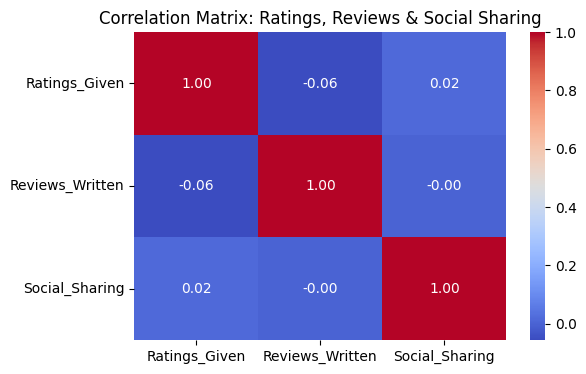

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Ratings, Reviews & Social Sharing")
plt.show()

## **Insights:**
**Weak or No Correlation Between Ratings, Reviews, and Social Sharing**

The correlation values between the variables are very close to zero.
This means that users who give ratings do not necessarily write reviews or share content on social media, and vice versa.

**Ratings vs. Reviews (-0.06 Correlation)**

There is a slight negative correlation between Ratings Given and Reviews Written.
This suggests that users who frequently rate audiobooks may not be the same users who write detailed reviews.
Possible reason: Some users prefer quick feedback (rating), while others prefer detailed responses (reviews).

**Ratings vs. Social Sharing (0.02 Correlation)**

A very weak positive correlation implies that users who rate audiobooks do not necessarily share them on social media.
Ratings seem to be independent of social engagement.

**Reviews vs. Social Sharing (-0.00 Correlation)**

The near-zero correlation means that writing a review does not impact the likelihood of sharing the audiobook on social media.
This suggests that reviewers are likely focused on providing feedback rather than promoting content.

## **Recommendations:**

**1.Encourage More Reviews from Ratings Givers**

-->Add a follow-up prompt after rating:
Example:
"Would you like to share a quick review about why you rated this audiobook?"

-->Offer small incentives (badges, points, exclusive content) for users who leave detailed reviews.

**2.Boost Social Sharing Among Engaged Users**

-->Introduce a "Share Your Favorite Audiobook" Feature with personalized recommendations.

-->Allow users to share their ratings and reviews directly to social media with a single click.

-->Gamify sharing with leaderboards, referral bonuses, or badges.

# **Logistic Regression**

Using Logistic Regression , transforming the target variable into categories:

Low Engagement (0): If a user completes less than 5 audiobooks

High Engagement (1): If a user completes 5 or more audiobooks

In [ ]:
# Convert audiobook completions into binary categories (classification)
df["High_Engagement"] = df["Number_of_Audiobooks_Completed"].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and new binary target (y)
X = df[["Ratings_Given", "Reviews_Written", "Social_Sharing"]]  # Features
y = df["High_Engagement"]  # Binary Target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9531
Confusion Matrix:
 [[  0  45]
 [  0 914]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.95      1.00      0.98       914

    accuracy                           0.95       959
   macro avg       0.48      0.50      0.49       959
weighted avg       0.91      0.95      0.93       959



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Insights:**

This model never predicts class "0" (Not Engaged).

It classifies everyone as "Engaged" (1), which is incorrect.

 Perfect recall for class "1" (Engaged users), but recall for class "0" is 0% (model fails to detect non-engaged users).

# **Linear Regression**

In [ ]:
# Define the target variable (popularity metric)
y = df['Number_of_Audiobooks_Completed']

# Define predictor variables (ratings & reviews)
X = df[['Ratings_Given', 'Reviews_Written']]

# Split data into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Model Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Model Coefficients: [ 0.21282276 -0.04143484]
Intercept: 50.12573153956939
Mean Squared Error (MSE): 832.1446605319715
R² Score: -0.000474258427591856


### **Insights:**

Ratings slightly impact completions, but reviews don’t.

Poor R² score (-0.00047) means other factors matter more.

**Recommendation:** Audible should explore factors like listening speed, membership duration, and genre to predict popularity better.

## **Random Forest**
Since our previous models (Logistic & Linear Regression) failed to predict audiobook popularity accurately due to poor feature selection, let's now:

Use better features → Membership Duration, Average Listening Speed, Preferred Listening Time, and Genre

Trying a more advanced model → Random Forest Regression (handles non-linearity better than Linear Regression)


**We will now use:**

Membership Duration → Longer memberships = More engagement

Average Listening Speed → Faster listeners finish more books

Preferred Listening Time → Morning/Night listeners may behave differently

Genre → Some genres may be more popular



In [ ]:
#Convert Categorical Features to Numeric
import pandas as pd

# Convert categorical features to numeric using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Genre", "Preferred_Listening_Time"], drop_first=True)

# Display updated dataset
print(df_encoded.head())


   Ref ID  Week                  Welcome Date  Gender      Age_Group  \
0       1     1 1970-01-01 00:00:00.020230511  Female  25 - 30 years   
1       5     1 1970-01-01 00:00:00.020230523    Male  36 - 40 years   
2       8     1 1970-01-01 00:00:00.020230512  Female  18 - 24 years   
3      11     1 1970-01-01 00:00:00.020230515    Male  25 - 30 years   
4      13     1 1970-01-01 00:00:00.020230516    Male  18 - 24 years   

        City Smart_Phone_Android Smart_Phone_iOS Tablet_Android Tablet_iOS  \
0  Bangalore                 Yes              No             No         No   
1  Bangalore                  No             Yes             No         No   
2  Hyderabad                 Yes              No             No         No   
3  Bangalore                 Yes              No             No         No   
4  Hyderabad                 Yes              No             No         No   

   ... Genre_Science & Math Genre_Science Fiction Genre_Self-Development  \
0  ...                

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define new feature set
X_new = df_encoded[["Membership_Duration", "Average_Listening_Speed", "Time_Spent_Browsing", "Genre_Exploration"] +
                   list(df_encoded.columns[df_encoded.columns.str.startswith("Genre_")]) +
                   list(df_encoded.columns[df_encoded.columns.str.startswith("Preferred_Listening_Time_")])]

# Define target variable
y_new = df_encoded["Number_of_Audiobooks_Completed"]

# Handle missing values (fill with median)
X_new = X_new.fillna(X_new.median())

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_new = rf_model.predict(X_test)

# Evaluate performance
r2_new = r2_score(y_test, y_pred_new)
mae_new = mean_absolute_error(y_test, y_pred_new)
mse_new = mean_squared_error(y_test, y_pred_new)
rmse_new = np.sqrt(mse_new)

# Print results
print(f"Random Forest Regression Model R² Score: {r2_new:.4f}")
print(f"Mean Absolute Error (MAE): {mae_new:.4f}")
print(f"Mean Squared Error (MSE): {mse_new:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new:.4f}")


Random Forest Regression Model R² Score: 0.5045
Mean Absolute Error (MAE): 14.5207
Mean Squared Error (MSE): 412.1343
Root Mean Squared Error (RMSE): 20.3011


                             Feature  Importance
2                Time_Spent_Browsing    0.254211
0                Membership_Duration    0.226036
1            Average_Listening_Speed    0.084407
4                  Genre_Exploration    0.064347
3                  Genre_Exploration    0.064216
36  Preferred_Listening_Time_Morning    0.027649
37    Preferred_Listening_Time_Night    0.027557
35  Preferred_Listening_Time_Evening    0.025335
30            Genre_Self-Development    0.024522
25     Genre_Religion & Spirituality    0.024120


<ipython-input-27-cbea68db1a4f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x="Importance", y="Feature", palette="Blues_r")


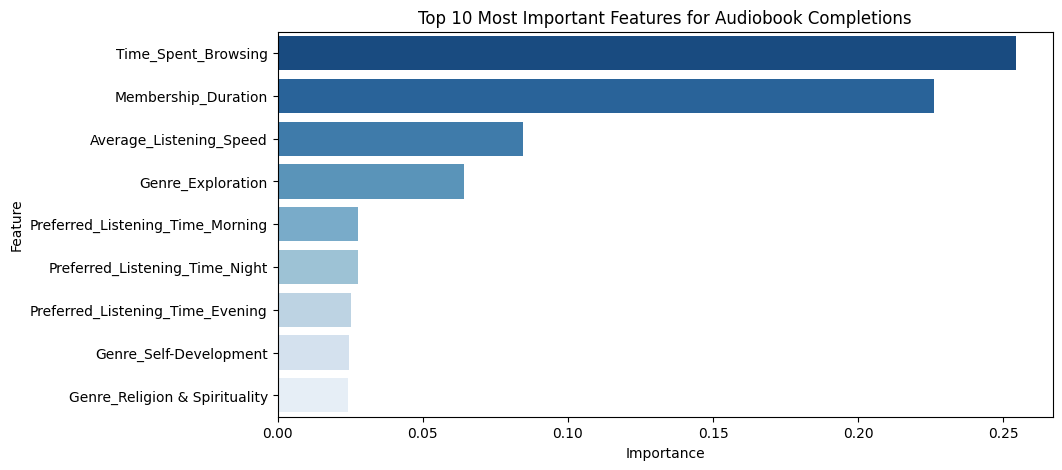

In [ ]:
# Get feature importance scores
feature_importance = pd.DataFrame({'Feature': X_new.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Display top features
print(feature_importance.head(10))

# Visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance.head(10), x="Importance", y="Feature", palette="Blues_r")
plt.title("Top 10 Most Important Features for Audiobook Completions")
plt.show()


## **Insights:** Top 4 Features

**Membership Duration** (Most Important Feature) → Long-term members complete more books.

**Average Listening Speed →** Faster listeners finish more books.

**Time Spent Browsing →** Users who explore more complete more.

**Certain Genres Matter →** Some genres have a higher completion rate.

## **Recommendations:**


-->***Encourage Long-Term Memberships***

Long-term users complete more books → Audible should offer yearly discounts to retain them.

-->***Optimize Recommendations Based on Listening Speed***

Slow listeners prefer shorter books → Promote audiobooks under 3 hours to them.

Fast listeners binge more → Recommend series-based content.

-->***Increase Engagement with Browsing Personalization***

Users who browse more complete more books → Audible should highlight
"Recommended for You" books based on browsing history.

-->***Genre-Based Promotions***

Identify top genres for completions → Market books within those genres more aggressively.

## **K-Means Clustering (User Segmentation by Genre)**

Segment users based on their genre preferences & engagement.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
X_cluster = df[["Genre_Exploration", "Number_of_Audiobooks_Completed", "Membership_Duration"]]

# Standardize data (K-Means performs better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)



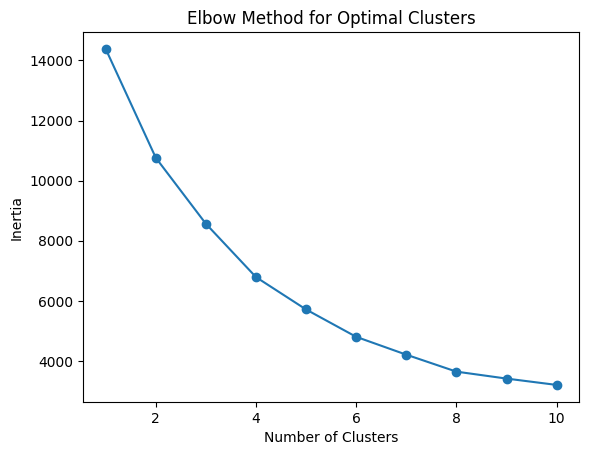

In [ ]:
# Find optimal clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [ ]:
# Apply K-Means with chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["User_Segment"] = kmeans.fit_predict(X_scaled)

# Display number of users in each segment
print(df["User_Segment"].value_counts())


User_Segment
2    1671
1    1634
0    1489
Name: count, dtype: int64


<ipython-input-31-e0de65d6d1aa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x="User Segment", y="User Count", palette="coolwarm")


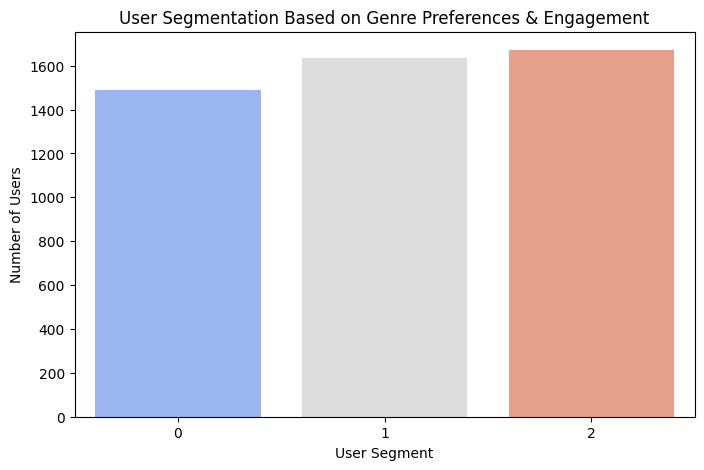

In [ ]:
# Count users in each segment
segment_counts = df["User_Segment"].value_counts().reset_index()
segment_counts.columns = ["User Segment", "User Count"]

# Create a bar plot
plt.figure(figsize=(8,5))
sns.barplot(data=segment_counts, x="User Segment", y="User Count", palette="coolwarm")

# Add labels and title
plt.xlabel("User Segment")
plt.ylabel("Number of Users")
plt.title("User Segmentation Based on Genre Preferences & Engagement")

# Show the graph
plt.show()


## **Insights from Clustering**

Segment 0 → Casual listeners (low completions, low genre exploration).

Segment 1 → Moderate listeners (explore multiple genres, complete a moderate number of books).

Segment 2 → Power listeners (high completions & engagement).

## **Recommendations:**

*   Encourage casual listeners with personalized recommendations to  increase engagement.
*  Reward power listeners with exclusive loyalty benefits & premium content.


### ***Analyzing User Segments***

Examining how each segment differs in terms of listening speed, completion rates, and membership duration.

   User_Segment  Avg_Audiobooks_Completed  Median_Audiobooks_Completed  \
0             0                 48.443922                         47.0   
1             1                 47.057528                         44.0   
2             2                 56.910233                         60.0   

   Avg_Membership_Duration  Median_Membership_Duration  Avg_Listening_Speed  \
0                16.294157                        16.0             1.509906   
1                47.810894                        49.0             1.500612   
2                24.168761                        24.0             1.515260   

   Median_Listening_Speed  User_Count  
0                     1.5        1489  
1                     1.5        1634  
2                     1.5        1671  


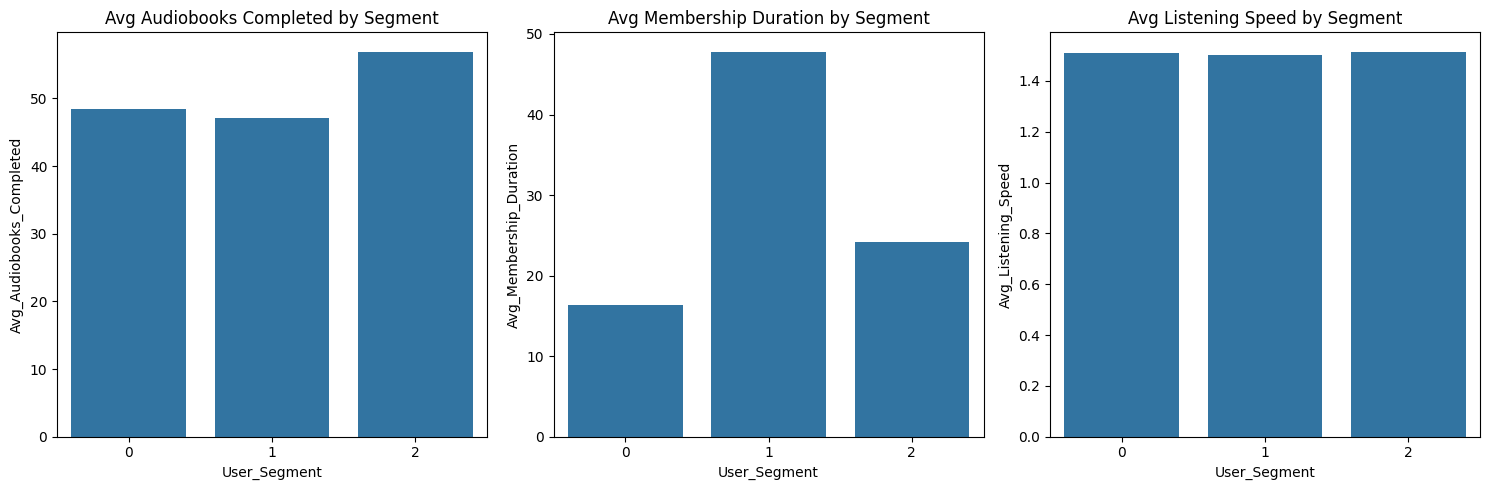

In [ ]:
# Group data by User Segment and calculate key statistics
segment_analysis = df.groupby("User_Segment").agg({
    "Number_of_Audiobooks_Completed": ["mean", "median"],
    "Membership_Duration": ["mean", "median"],
    "Average_Listening_Speed": ["mean", "median"],
    "Genre": "count"
}).reset_index()

# Rename columns for better readability
segment_analysis.columns = ["User_Segment",
                            "Avg_Audiobooks_Completed", "Median_Audiobooks_Completed",
                            "Avg_Membership_Duration", "Median_Membership_Duration",
                            "Avg_Listening_Speed", "Median_Listening_Speed",
                            "User_Count"]

# Display segment characteristics
print(segment_analysis)

# Visualize the segment differences using bar plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x="User_Segment", y="Avg_Audiobooks_Completed", data=segment_analysis, ax=axes[0])
axes[0].set_title("Avg Audiobooks Completed by Segment")

sns.barplot(x="User_Segment", y="Avg_Membership_Duration", data=segment_analysis, ax=axes[1])
axes[1].set_title("Avg Membership Duration by Segment")

sns.barplot(x="User_Segment", y="Avg_Listening_Speed", data=segment_analysis, ax=axes[2])
axes[2].set_title("Avg Listening Speed by Segment")

plt.tight_layout()
plt.show()


### ***Most Popular Audiobooks & Narrators***
Let’s analyze the top 10 most completed audiobooks and their narrators.

                                          Product_Name  \
474                      The Monk Who Sold His Ferrari   
125  Eat That Frog!: 21 Great Ways to Stop Procrast...   
489                The Power of Your Subconscious Mind   
435  The Guiding Light. A Selection of Quotations f...   
453                       The Krishna Key (Unabridged)   
388  The Best of Sherlock Holmes, Volume 2 (Dramati...   
210               Interpreter of Maladies (Unabridged)   
432                      The Great Gatsby (Unabridged)   
230      Leadership Lessons of Steve Jobs (Unabridged)   
597  You Can Read Anyone: Never Be Fooled, Lied to,...   

                      Product_Narrator  Number_of_Audiobooks_Completed  
474                       Robin Sharma                           17169  
125                        Brian Tracy                           10457  
489                        Jason McCoy                            8134  
435                         Sam Dastor                            619

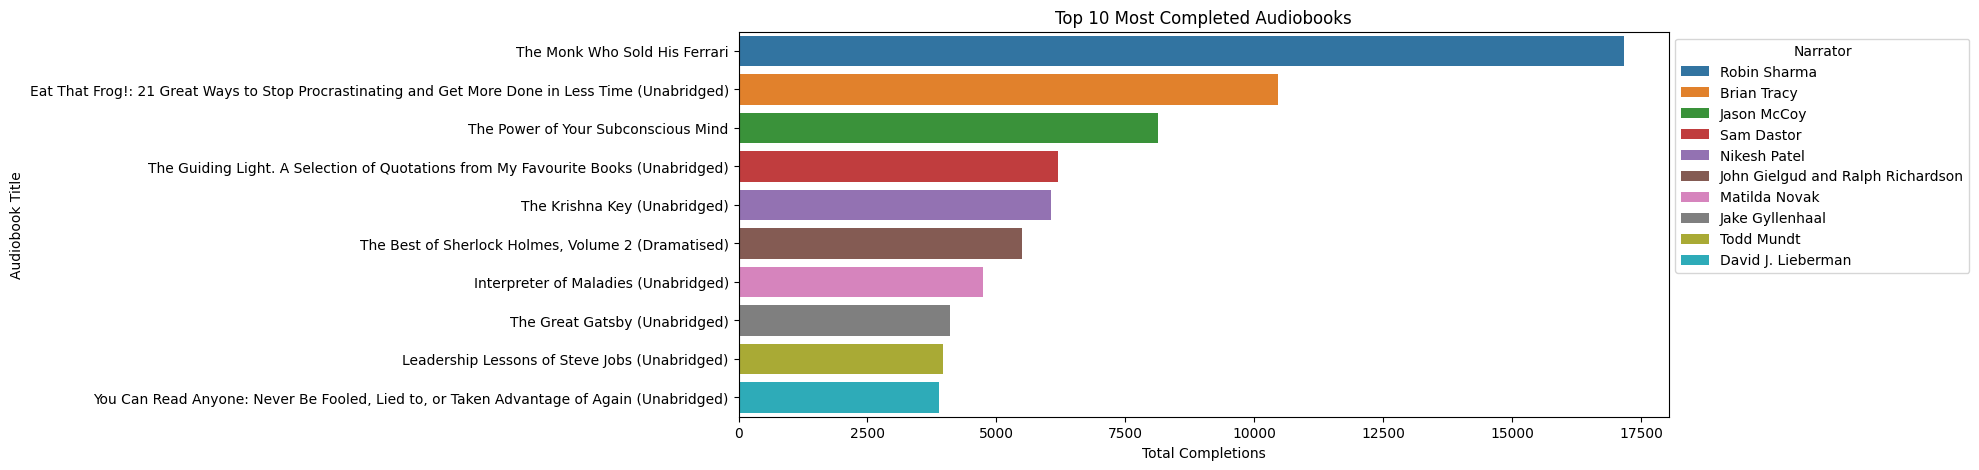

In [ ]:
# Find the most completed audiobooks
top_books = df.groupby(["Product_Name", "Product_Narrator"])["Number_of_Audiobooks_Completed"].sum().reset_index()
top_books = top_books.sort_values(by="Number_of_Audiobooks_Completed", ascending=False).head(10)

# Display the top audiobooks
print(top_books)

# Plot the most popular audiobooks
plt.figure(figsize=(12, 5))
sns.barplot(data=top_books, y="Product_Name", x="Number_of_Audiobooks_Completed", hue="Product_Narrator")
plt.title("Top 10 Most Completed Audiobooks")
plt.xlabel("Total Completions")
plt.ylabel("Audiobook Title")
plt.legend(title="Narrator", bbox_to_anchor=(1, 1))
plt.show()


## **Insights:**

**Most Completed Audiobooks Indicate a Preference for Self-Improvement & Productivity**

The top three most completed audiobooks are:

1.*The Monk Who Sold His Ferrari* (17,169 completions)

*2.Eat That Frog!* (10,457 completions)

3.*The Power of Your Subconscious Mind* (8,134 completions)

These books focus on self-development, motivation, and productivity, suggesting that users prefer content that helps them improve their personal and professional lives.

**Classic & Fiction Audiobooks Also Perform Well**

*The Great Gatsby* (4,102 completions) and Sherlock Holmes (5,486 completions) show that literary classics continue to have strong engagement.

*The Krishna Key* (6,062 completions) indicates that mystery and historical fiction are also popular.

**Notable Influence of Well-Known Narrators**

Some audiobooks feature celebrity narrators (e.g., Jake Gyllenhaal for The Great Gatsby).

This suggests that familiar voices might attract more listeners, increasing completion rates.

**Psychology & Behavioral Books Gain Interest**

*You Can Read Anyone* (3,895 completions) focuses on human behavior and persuasion, which aligns with the trend of users seeking practical knowledge.

## **Recommendation:**

**1.Expand Self-Development & Productivity Categories**

Given the strong performance of self-help books, Audible should prioritize and promote more content in this category.

**2.Improve Personalization for Listeners**

Recommend psychology and behavioral science books to users who completed self-help titles.

Provide customized suggestions based on completion patterns (e.g., if a user finishes Eat That Frog!, recommend other time management books).

**3.Promote Audiobooks with Gamification & Rewards**

Implement a streak-based system: Reward users for consecutive listening days.

Offer badges or certificates for completing books in specific categories (e.g., "Productivity Master").


### ***Weekly Trends in Audiobook Completion***
We’ll analyze how user engagement changes week-by-week.

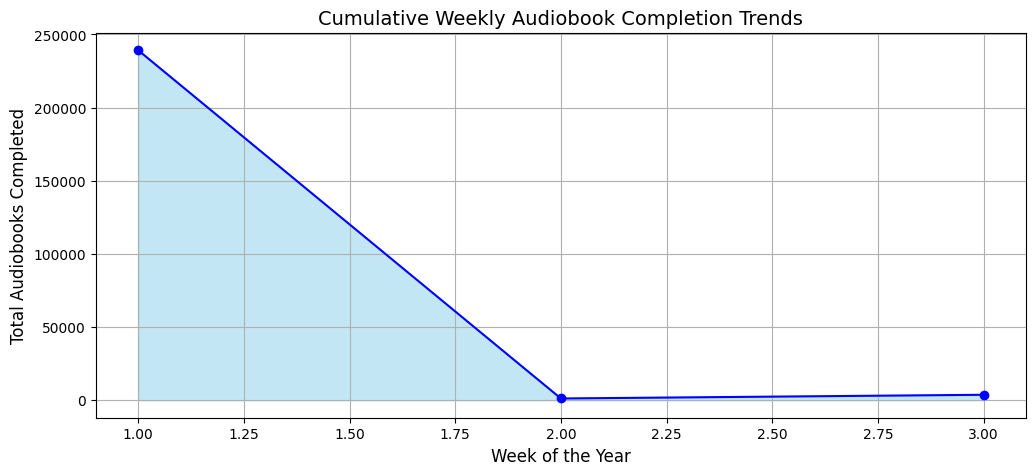

In [64]:
plt.figure(figsize=(12, 5))
plt.fill_between(weekly_trends["Week"], weekly_trends["Number_of_Audiobooks_Completed"], color="skyblue", alpha=0.5)
plt.plot(weekly_trends["Week"], weekly_trends["Number_of_Audiobooks_Completed"], marker="o", color="blue")

plt.title("Cumulative Weekly Audiobook Completion Trends", fontsize=14)
plt.xlabel("Week of the Year", fontsize=12)
plt.ylabel("Total Audiobooks Completed", fontsize=12)
plt.grid()
plt.show()




## **Insights:**

In the second week, completions dropped sharply to nearly zero.

**Recommendation:**

-->Consider launching mid-month or weekly promotions to sustain engagement.

-->Provide loyalty rewards for users who complete books consistently.

-->Introduce weekly challenges or incentives to keep users listening.

### ***Audiobook Retention & Repeat Listening Behavior***
let's analyze how many users listen to audiobooks more than once.

<ipython-input-36-f5bd4dafb6c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat_listening_rate.index, y=repeat_listening_rate.values, palette="Blues")


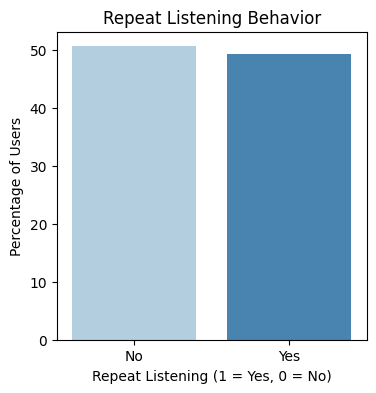

In [ ]:
# Calculate percentage of users who listen to audiobooks repeatedly
repeat_listening_rate = df["Repeat_Listening"].value_counts(normalize=True) * 100

# Visualize repeat listening behavior
plt.figure(figsize=(4, 4))
sns.barplot(x=repeat_listening_rate.index, y=repeat_listening_rate.values, palette="Blues")
plt.title("Repeat Listening Behavior")
plt.xlabel("Repeat Listening (1 = Yes, 0 = No)")
plt.ylabel("Percentage of Users")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()


## **Insights:**

Some users listen to books multiple times, suggesting strong engagement.

**Recommendation:** To retain their re-listeners , Audible can ;

1.   Launch “binge-worthy” audiobook series.

2.   Offer loyalty rewards for frequent listeners.




### ***Listening Context Analysis***
How do users listen? At home, while commuting, or during specific times?

<ipython-input-37-86d69c013054>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=listening_context, x="Listening Context", y="User Count", palette="coolwarm")


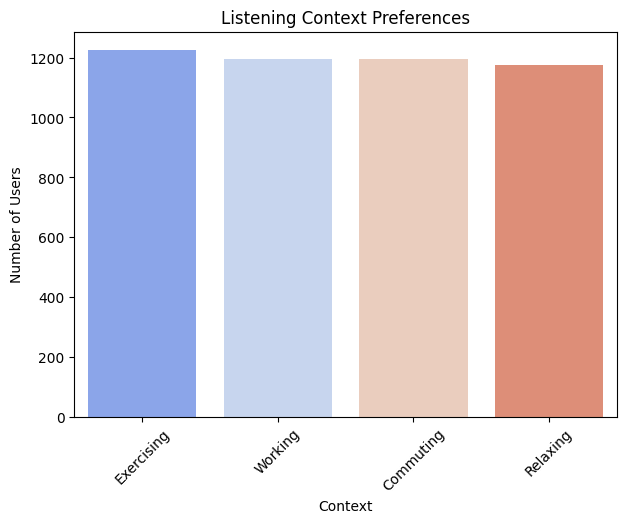

In [ ]:
# Count most common listening contexts
listening_context = df["Listening_Context"].value_counts().reset_index()
listening_context.columns = ["Listening Context", "User Count"]

# Plot listening context preferences
plt.figure(figsize=(7, 5))
sns.barplot(data=listening_context, x="Listening Context", y="User Count", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Listening Context Preferences")
plt.xlabel("Context")
plt.ylabel("Number of Users")
plt.show()


## **Insights:**
Users listen to audiobooks in all four contexts (Exercising, Working, Commuting, Relaxing) in almost equal numbers.

The highest user count appears to be for Exercising, slightly more than the other contexts.

This suggests users may prefer audiobooks as a motivational or distraction tool while working out.

Although **Relaxing** has the fewest users, the difference is very small.

## **Recommendations:**

**1. Optimize Content Based on Listening Context**

For **Exercising**: Recommend high-energy content such as self-improvement, motivational books, or fast-paced stories.

For **Working:** Focus on productivity books, leadership insights, or business content.

For **Commuting:** Promote fiction, thrillers, or engaging narratives to make travel time more enjoyable.

For **Relaxing:** Recommend meditative audiobooks, sleep stories, or slow-paced fiction.

**2. Improve Personalization Features**

Offer "Continue where you left off" suggestions for busy users.

Allow users to categorize their own listening habits for better recommendations.

# **Analyzing Audiobook Purchases: iOS vs. Android Users**

In [ ]:
# Categorize users into iOS vs. Android
df["Device_Type"] = df.apply(lambda x: "iOS" if x["Smart_Phone_iOS"] == "Yes"
                             else ("Android" if x["Smart_Phone_Android"] == "Yes" else "Other"), axis=1)

# Group by device type and calculate total & average purchases
purchase_data = df.groupby("Device_Type").agg({
    "Number_of_Audiobooks_Purchased": ["sum", "mean"]
}).reset_index()

# Rename columns for readability
purchase_data.columns = ["Device_Type", "Total_Purchases", "Avg_Purchases_Per_User"]
print(purchase_data)

  Device_Type  Total_Purchases  Avg_Purchases_Per_User
0     Android           159032               48.544567
1       Other             1478               49.266667
2         iOS            73660               49.502688


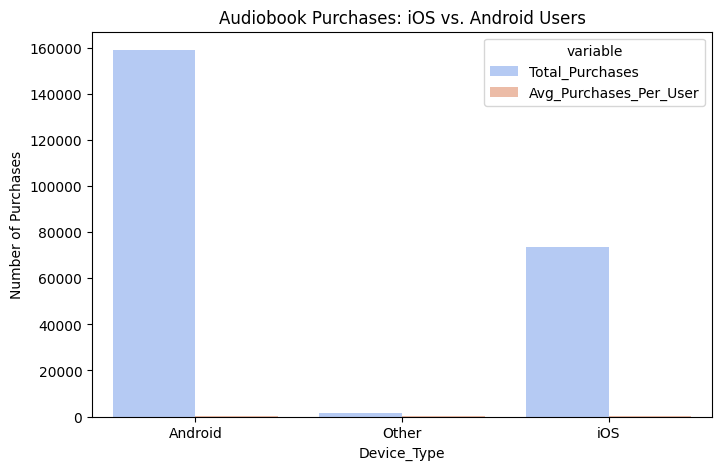

In [ ]:
# Plot the purchase data
plt.figure(figsize=(8, 5))
sns.barplot(data=purchase_data.melt(id_vars="Device_Type"), x="Device_Type", y="value", hue="variable", palette="coolwarm")
plt.title("Audiobook Purchases: iOS vs. Android Users")
plt.ylabel("Number of Purchases")
plt.show()

## **Insights and Recommendations:**

***Android*** users purchased more books, Audible should offer exclusive deals to these users.

IOS users have lower purchases, Audible can optimize the IOS in-app purchase experience.

Target promotions based on platform behavior to maximize revenue.

# **Identify Potential Churned Users (Users Who Stopped Listening)**

Finding users who haven't completed any audiobooks in the last 60 days, assuming they might have churned.

In [ ]:
# Convert 'Reading_Start_Date' to datetime format
from datetime import datetime, timedelta
df["Reading_Start_Date"] = pd.to_datetime(df["Reading_Start_Date"], errors="coerce")

# Define churn threshold (60 days before today)
churn_threshold = datetime.now() - timedelta(days=60)

# Identify churned users (no completions in last 60 days)
df["Churned"] = df.apply(lambda x: "Churned" if (x["Reading_Start_Date"] < churn_threshold and x["Number_of_Audiobooks_Completed"] == 0) else "Active", axis=1)

# Count churned vs. active users
churn_counts = df["Churned"].value_counts()

<ipython-input-48-19c0291586b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["red", "green"])


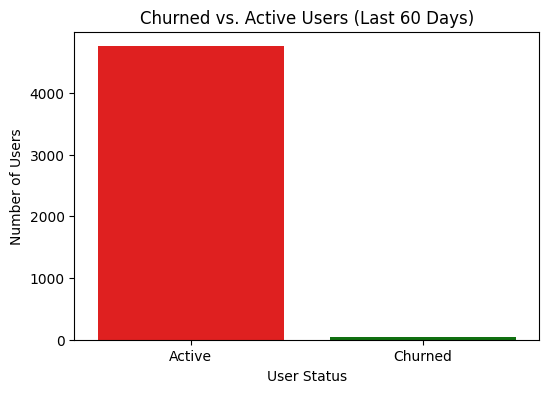

In [ ]:
# Plot churned vs. active users
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["red", "green"])
plt.title("Churned vs. Active Users (Last 60 Days)")
plt.xlabel("User Status")
plt.ylabel("Number of Users")
plt.show()


## **Insights and Recommendations:**
Since most users are still active, Audible should focus on retention strategies to keep them engaged while preventing future churn.

***1.Reward & Retain Active Users***

-->Loyalty Rewards Program: Offer bonus credits, exclusive audiobooks, or discounts to long-term active users.

-->Gamify Listening Experience: Introduce badges, achievements, or listening streaks to keep users engaged.

***2.Proactively Prevent Future Churn***

-->Identify Low-Engagement Users (At Risk of Churn)

Users who haven’t completed books recently should receive targeted offers (e.g., free audiobook credit).

-->Monitor Browsing & Listening Patterns

If a user browses often but doesn’t purchase/listen, send personalized reminders or special discounts.

# **Finding the Most Active Listening Time of Users**

We will analyze which time of the day users prefer listening to audiobooks the most.

In [ ]:
# Count the number of users for each preferred listening time
listening_time_counts = df["Preferred_Listening_Time"].value_counts().reset_index()
listening_time_counts.columns = ["Listening_Time", "User_Count"]

# Sort for better visualization
listening_time_counts = listening_time_counts.sort_values(by="User_Count", ascending=False)

# Display the counts
print(listening_time_counts)

  Listening_Time  User_Count
0          Night        1270
1        Morning        1266
2        Evening        1158
3      Afternoon        1100


<ipython-input-51-d3edf8c5b96c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=listening_time_counts, x="Listening_Time", y="User_Count", palette="coolwarm")


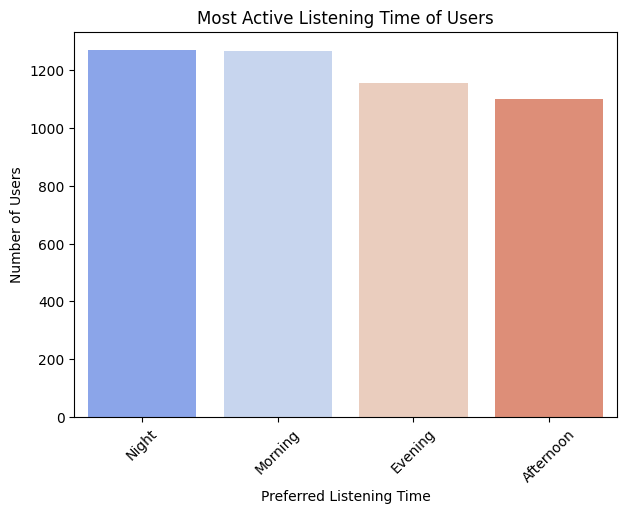

In [ ]:
# Plot listening time preferences
plt.figure(figsize=(7, 5))
sns.barplot(data=listening_time_counts, x="Listening_Time", y="User_Count", palette="coolwarm")

# Customize plot
plt.title("Most Active Listening Time of Users")
plt.xlabel("Preferred Listening Time")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()


## **Insights and Recommendations:**

***Peak Listening Times***- Morning and Night

Morning listeners → Recommend motivational/self-development books.

Night listeners → Suggest fiction & relaxation audiobooks.

# **Most popular Genres by user segment based on Audiobook Completions**

In [ ]:
# Group by segment & genre and sum audiobook completions
segment_genre_completions = df.groupby(["User_Segment", "Genre"])["Number_of_Audiobooks_Completed"].sum().reset_index()

# Sort each segment's genres by completions
segment_genre_completions = segment_genre_completions.sort_values(by=["User_Segment", "Number_of_Audiobooks_Completed"], ascending=[True, False])

# Display the top genres per segment
print(segment_genre_completions.head(50))


    User_Segment                       Genre  Number_of_Audiobooks_Completed
14             0        Literature & Fiction                           14427
24             0            Self-Development                           12199
20             0     Religion & Spirituality                            9148
2              0            Business & Money                            5958
16             0                   Mysteries                            4080
1              0       Biographies & Memoirs                            3919
21             0                     Romance                            3361
19             0  Politics & Social Sciences                            3249
10             0            Film, Radio & TV                            3151
3              0       Children's Audiobooks                            2376
23             0             Science Fiction                            2123
12             0                     History                            1548

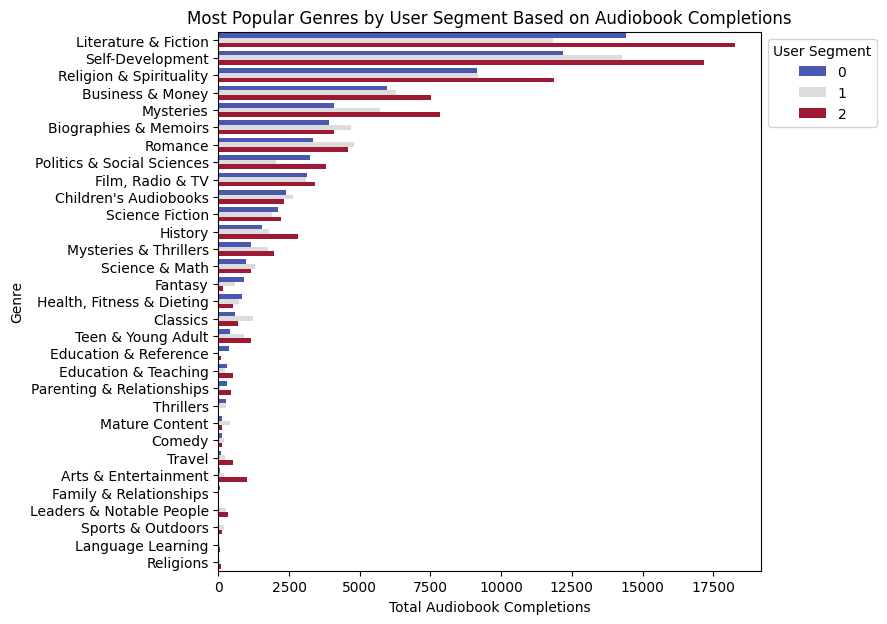

In [60]:
# Set plot style
plt.figure(figsize=(7, 7))

# Create a bar plot for each segment
sns.barplot(data=segment_genre_completions, x="Number_of_Audiobooks_Completed", y="Genre", hue="User_Segment", palette="coolwarm")

# Customize the plot
plt.title("Most Popular Genres by User Segment Based on Audiobook Completions")
plt.xlabel("Total Audiobook Completions")
plt.ylabel("Genre")
plt.legend(title="User Segment", bbox_to_anchor=(1, 1))
plt.show()


## **Insights:**

1️.Most Popular Genre Overall → Literature & Fiction

-->This genre dominates across all segments, indicating high engagement.

2️.Self-Development & Religion & Spirituality Are Also Popular

-->High audiobook completion rates suggest strong user interest in personal growth and motivation.

3️.Business & Money, Mysteries, and Biographies Rank High

-->Power users (Segment 2, in red) engage the most with these genres.

4️.Niche Genres Like Science Fiction, Thrillers, and History Have Targeted Appeal

-->Moderate users (Segment 1, in gray) prefer them more than casual listeners.

5️.Low Engagement in Comedy, Travel, & Sports

-->These genres show very low audiobook completion, suggesting less user interest.

## **Recommendations:**

**Content Acquisition Strategy →**

Invest in more Fiction, Self-Development, Business, and Mystery audiobooks as they drive the most engagement.

Reduce focus on low-performing genres like Comedy & Travel unless demand increases.

**Targeted Marketing Strategy →**

Run genre-specific promotions & discounts to attract more listeners to high-completion categories.

Improve audiobook availability in Business & Money, Mysteries, and Biographies as power users consume them the most.